<a href="https://colab.research.google.com/github/PriyankaKocherla/FMML-Module-5-Project/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

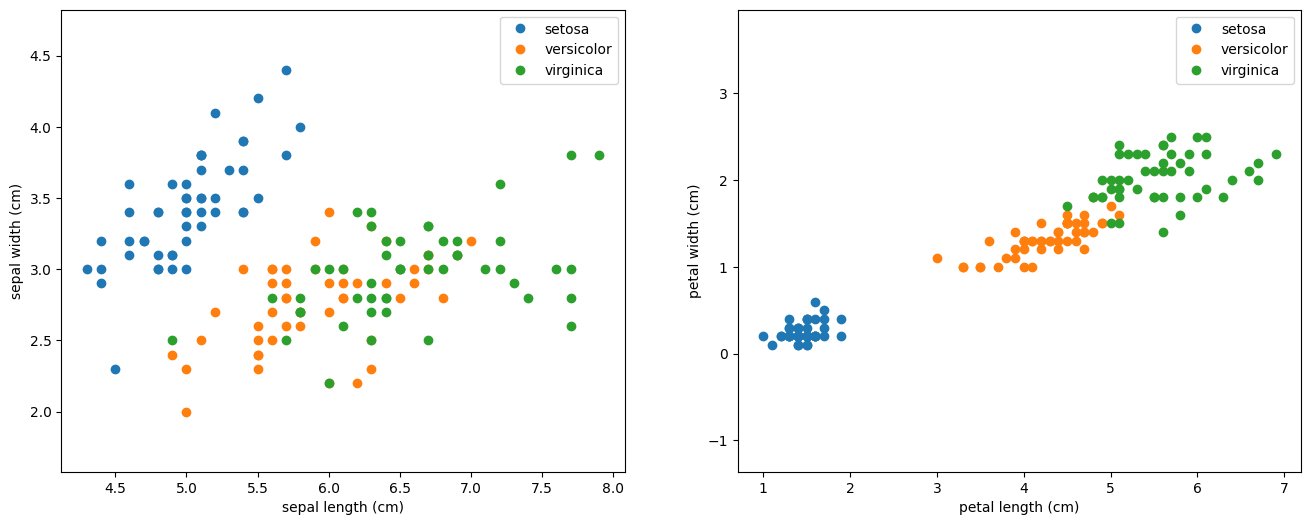

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [6]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [7]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [8]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 223.79it/s]


# Plot training progress

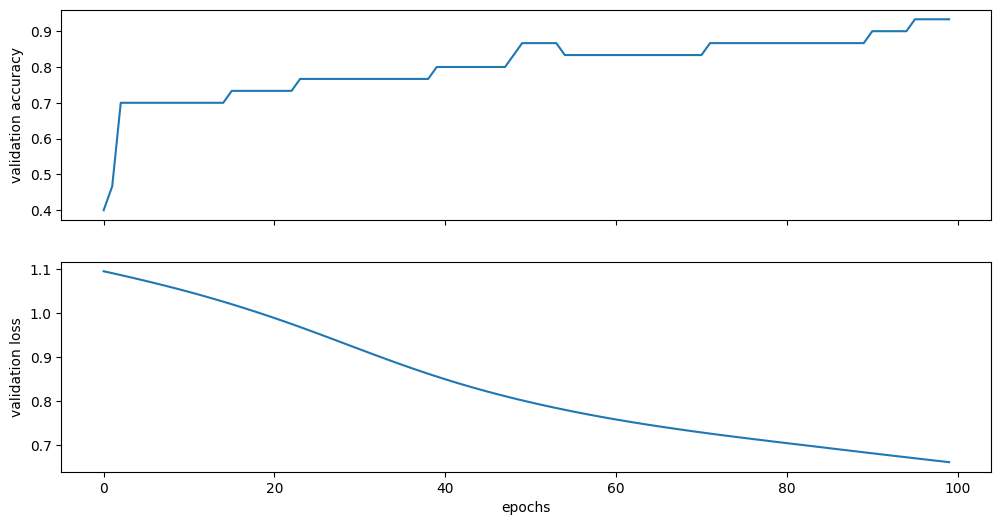

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# 1ST ANSWER  



Sure thing! If we're talking about a neural network, adding or removing hidden layers can influence the model's capacity to learn and generalize from data.

For example, let's consider a simple feedforward neural network with one input layer, one output layer, and initially one hidden layer. If you want to add another hidden layer, the architecture would look something like this:


# 2ND ANSWER  



Absolutely! Changing the number of neurons in the hidden layer can also have a significant impact on the model's performance. The number of neurons determines the complexity of the representations that the hidden layer can learn.

Here's a breakdown:

1. **Increasing Neurons**: Adding more neurons can increase the capacity of the model to learn complex patterns but may also lead to overfitting if not regularized properly.

2. **Decreasing Neurons**: Reducing the number of neurons can simplify the model, making it less likely to overfit but potentially reducing its ability to learn complex patterns.

Let's consider a simple example:

**Initial Architecture**:
- Input Layer: 10 neurons
- Hidden Layer: 50 neurons
- Output Layer: 1 neuron (for a binary classification task, for example)

**Modified Architecture**:
- Input Layer: 10 neurons
- Hidden Layer: 100 neurons
- Output Layer: 1 neuron

Or

- Input Layer: 10 neurons
- Hidden Layer: 25 neurons
- Output Layer: 1 neuron

Would you like to proceed with a specific architecture or a particular task in mind?

# 3RD ANSWER    


Sure! The choice of activation function can also significantly affect the performance of a neural network. Here are some commonly used activation functions:

1. **ReLU (Rectified Linear Unit)**: \( f(x) = \max(0, x) \)
2. **Sigmoid**: \( f(x) = \frac{1}{1 + e^{-x}} \)
3. **Tanh**: \( f(x) = \frac{e^{2x} - 1}{e^{2x} + 1} \)
4. **Softmax**: Used mainly in the output layer for multi-class classification tasks.

Let's consider a simple feedforward neural network with one hidden layer as an example:

**Initial Architecture**:
- Input Layer -> Hidden Layer (using ReLU) -> Output Layer

**Modified Architecture**:
- Input Layer -> Hidden Layer (using Tanh) -> Output Layer

Or

- Input Layer -> Hidden Layer (using Sigmoid) -> Output Layer

Would you like to try one of these modifications, or do you have a specific activation function in mind?

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?